<a href="https://www.kaggle.com/code/lorenzoarcioni/netflix-dataset-complete-eda?scriptVersionId=218788114" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movie-rating-dataset/Netflix_Dataset_Movie.csv
/kaggle/input/netflix-movie-rating-dataset/Netflix_Dataset_Rating.csv


In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the datasets
movies_file = "/kaggle/input/netflix-movie-rating-dataset/Netflix_Dataset_Movie.csv"
ratings_file = "/kaggle/input/netflix-movie-rating-dataset/Netflix_Dataset_Rating.csv"

In [50]:
# Load movie data
movies_df = pd.read_csv(movies_file)
print("Movies dataset sample:")
movies_df.head()

Movies dataset sample:


,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [51]:
# Load ratings data
ratings_df = pd.read_csv(ratings_file)
print("Ratings dataset sample:")
ratings_df.head()

Ratings dataset sample:


,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


In [52]:
# Inspect data structures
print("\nMovies Dataset Info:")
print(movies_df.info())

print("\nRatings Dataset Info:")
print(ratings_df.info())


Movies Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  17770 non-null  int64 
 1   Year      17770 non-null  int64 
 2   Name      17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB
None

Ratings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   User_ID   int64
 1   Rating    int64
 2   Movie_ID  int64
dtypes: int64(3)
memory usage: 396.8 MB
None


In [53]:
# Check for missing values
print("\nMissing values in Movies dataset:")
print(movies_df.isnull().sum())

print("\nMissing values in Ratings dataset:")
print(ratings_df.isnull().sum())


Missing values in Movies dataset:
Movie_ID    0
Year        0
Name        0
dtype: int64

Missing values in Ratings dataset:
User_ID     0
Rating      0
Movie_ID    0
dtype: int64


In [54]:
# Merge datasets for a unified view
merged_df = ratings_df.merge(movies_df, on="Movie_ID", how="left")

# Exploratory Data Analysis
print("\nMerged Dataset Info:")
print(merged_df.info())

print("\nBasic Statistics:")
print(merged_df.describe())


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   User_ID   int64 
 1   Rating    int64 
 2   Movie_ID  int64 
 3   Year      int64 
 4   Name      object
dtypes: int64(4), object(1)
memory usage: 661.4+ MB
None

Basic Statistics:
            User_ID        Rating      Movie_ID          Year
count  1.733746e+07  1.733746e+07  1.733746e+07  1.733746e+07
mean   1.321158e+06  3.590570e+00  2.302783e+03  1.993895e+03
std    7.646923e+05  1.062665e+00  1.303458e+03  1.248583e+01
min    6.000000e+00  1.000000e+00  3.000000e+00  1.920000e+03
25%    6.602280e+05  3.000000e+00  1.176000e+03  1.990000e+03
50%    1.316775e+06  4.000000e+00  2.342000e+03  1.999000e+03
75%    1.983213e+06  4.000000e+00  3.433000e+03  2.002000e+03
max    2.649429e+06  5.000000e+00  4.496000e+03  2.005000e+03


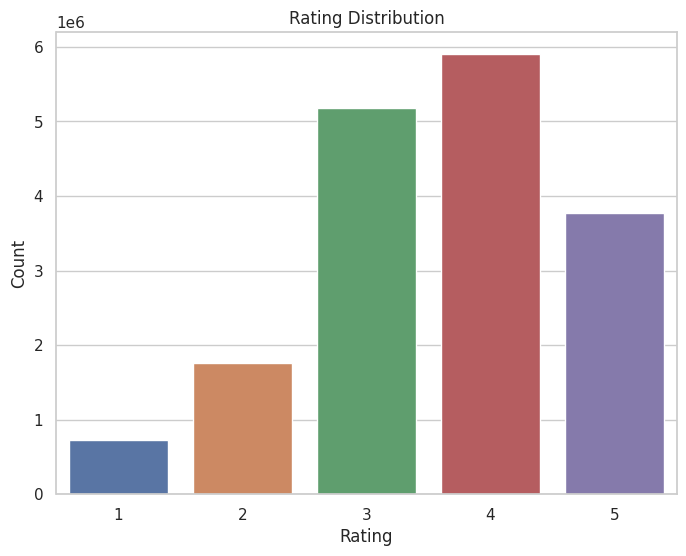

In [55]:
# Rating distribution

# Count ratings
rating_counts = merged_df["Rating"].value_counts()

# Plot rating distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


Top 20 Movies by Number of Ratings:
Name
Pirates of the Caribbean: The Curse of the Black Pearl    117075
Lord of the Rings: The Fellowship of the Ring             102721
The Sixth Sense                                           102376
American Beauty                                           101450
Bruce Almighty                                             98545
The Silence of the Lambs                                   95053
Finding Nemo (Widescreen)                                  94235
The Italian Job                                            93886
Shrek 2                                                    92893
Braveheart                                                 91502
Ghost                                                      87082
What Women Want                                            86756
The Last Samurai                                           86354
50 First Dates                                             85605
The Bourne Supremacy                            

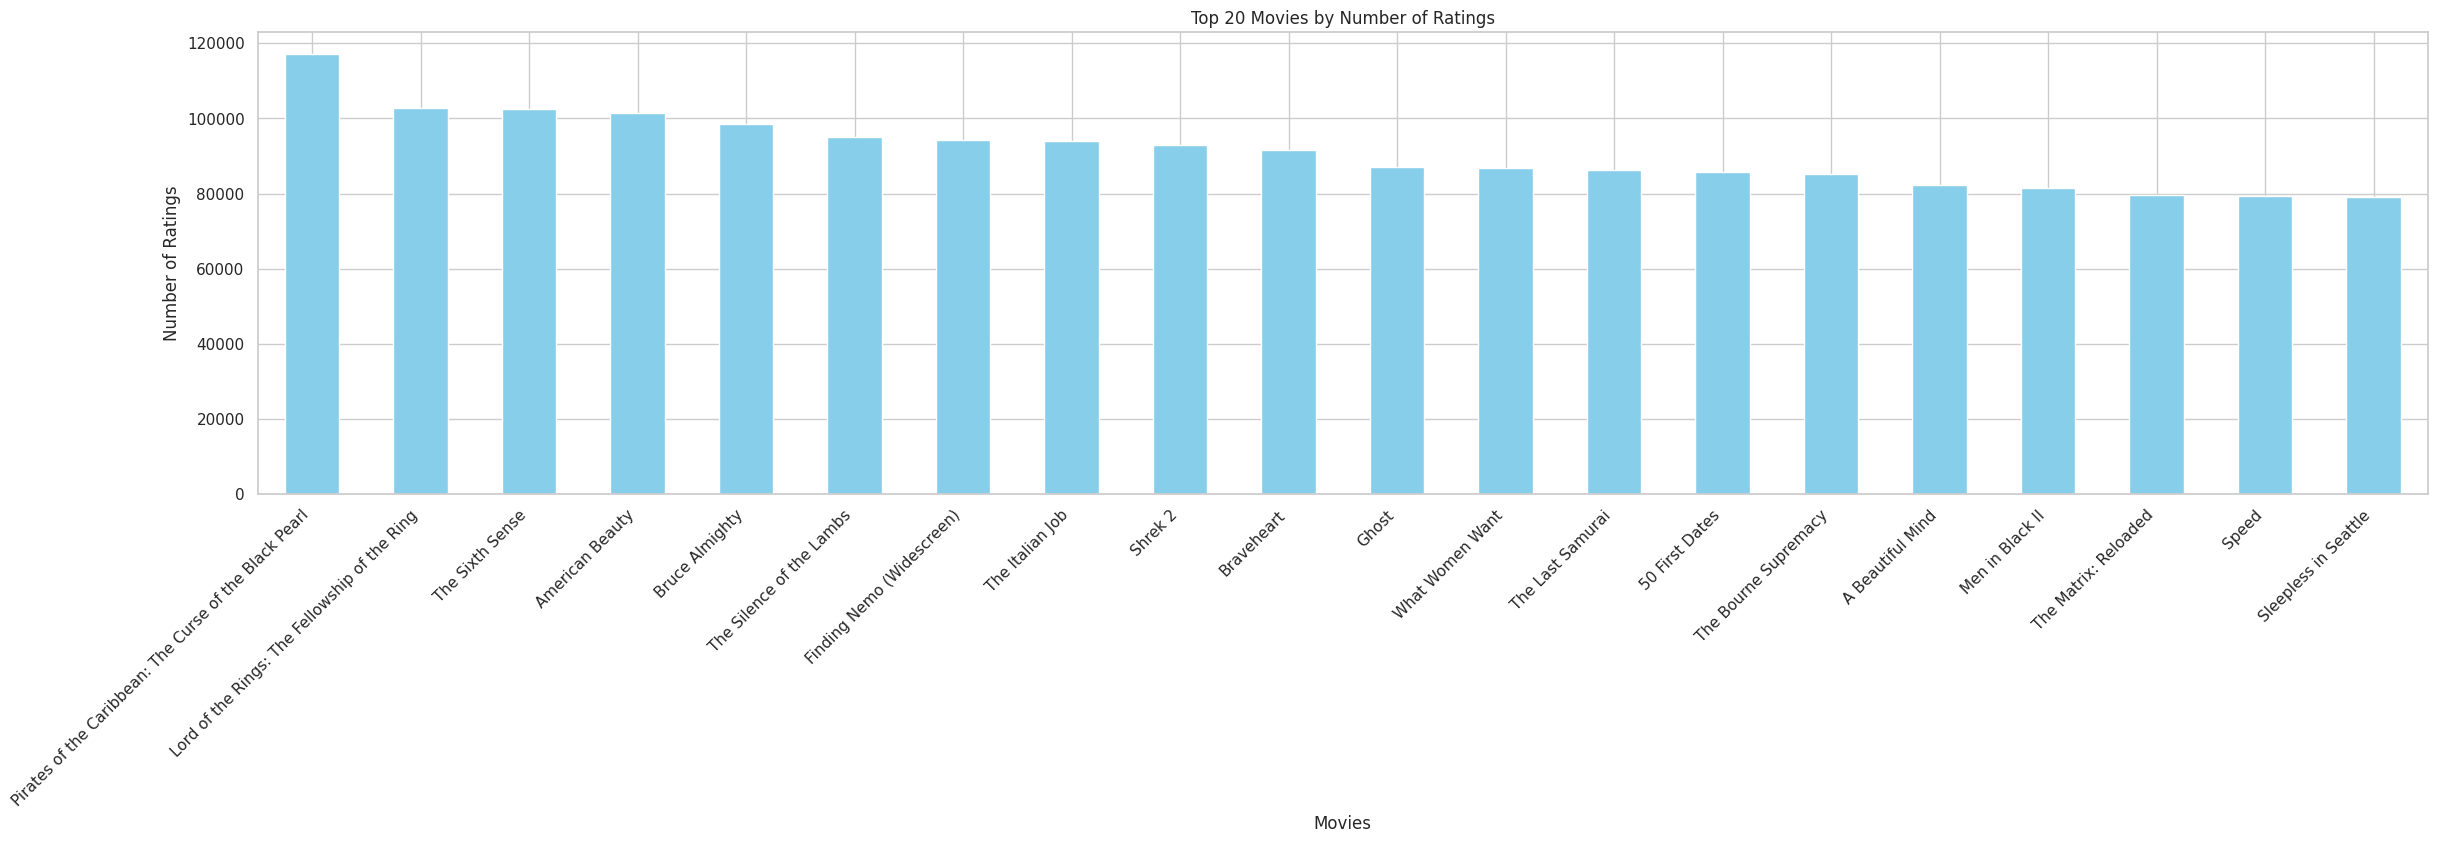

In [56]:
# Number of ratings per movie
movie_ratings = merged_df.groupby("Name").size().sort_values(ascending=False)
top_movies = movie_ratings.head(20)
print("\nTop 20 Movies by Number of Ratings:")
print(top_movies)

plt.figure(figsize=(28, 6))
top_movies.plot(kind='bar', color='skyblue')
plt.title("Top 20 Movies by Number of Ratings")
plt.xlabel("Movies")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45, ha='right')
plt.show()

In [57]:
# Average rating per movie
avg_ratings = merged_df.groupby("Name")["Rating"].mean().sort_values(ascending=False)
print("\nTop 10 Movies by Average Rating:")
print(avg_ratings.head(10))


Top 10 Movies by Average Rating:
Name
Lost: Season 1                                   4.665432
The Simpsons: Season 6                           4.589824
Family Guy: Freakin' Sweet Collection            4.520766
Six Feet Under: Season 4                         4.461601
Inu-Yasha                                        4.457774
Stargate SG-1: Season 8                          4.456026
The Best of Friends: Vol. 4                      4.449168
The West Wing: Season 3                          4.436258
Lord of the Rings: The Fellowship of the Ring    4.431489
Gilmore Girls: Season 3                          4.428943
Name: Rating, dtype: float64



User Ratings Distribution:
count    143458.000000
mean        120.853895
std          79.783702
min           5.000000
25%          67.000000
50%          95.000000
75%         147.000000
max        1344.000000
dtype: float64


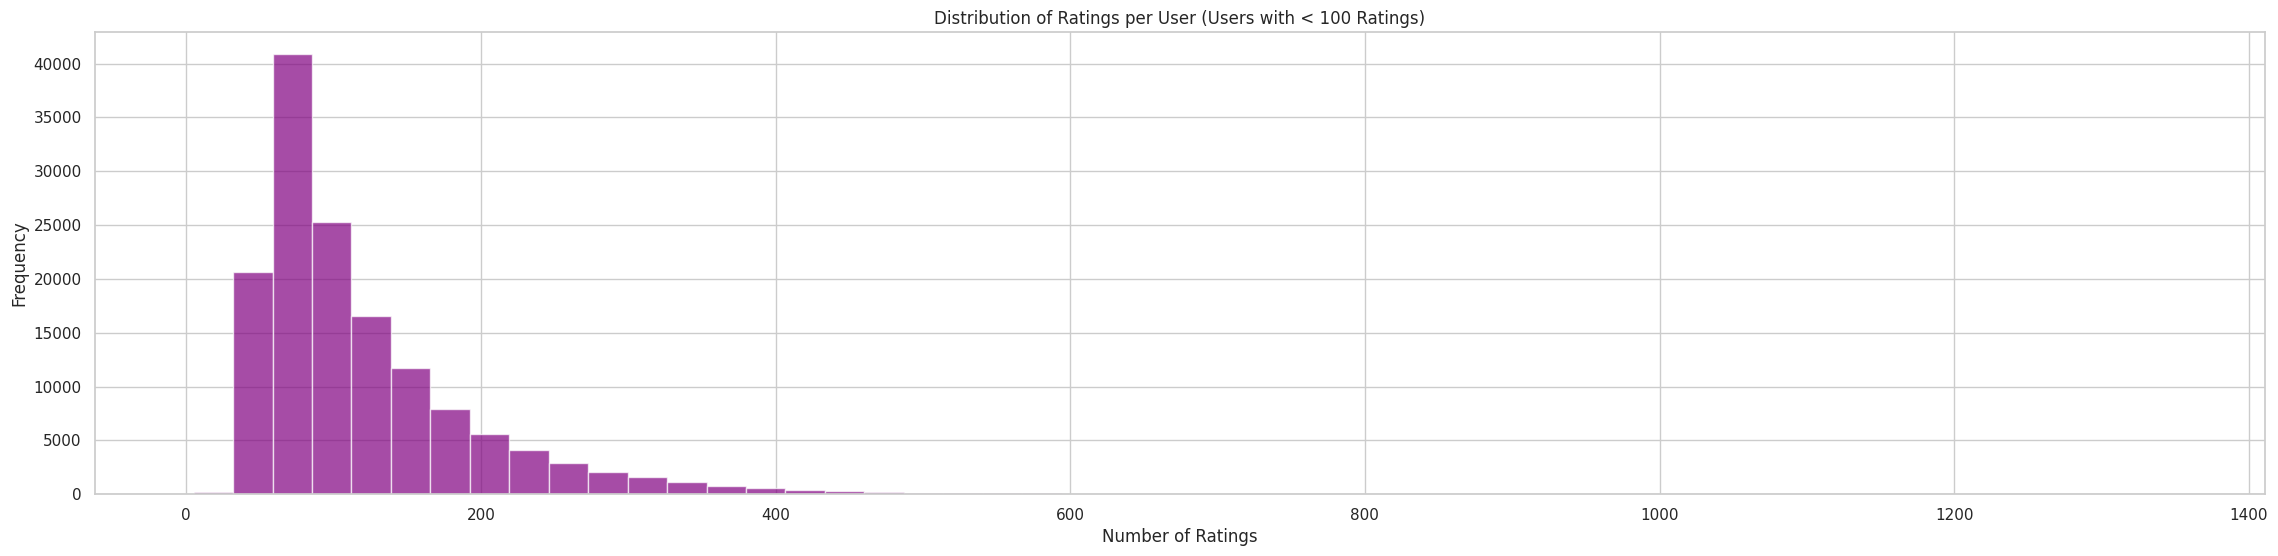

In [58]:
# Number of ratings per user
user_ratings = merged_df.groupby("User_ID").size()
print("\nUser Ratings Distribution:")
print(user_ratings.describe())

plt.figure(figsize=(28, 6))
user_ratings.plot(kind='hist', bins=50, color='purple', alpha=0.7)
plt.title("Distribution of Ratings per User (Users with < 100 Ratings)")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()


Film Ratings Distribution:
count      1350.000000
mean      12842.561481
std       17805.334719
min        1042.000000
25%        2607.750000
50%        5229.000000
75%       14792.000000
max      117075.000000
dtype: float64


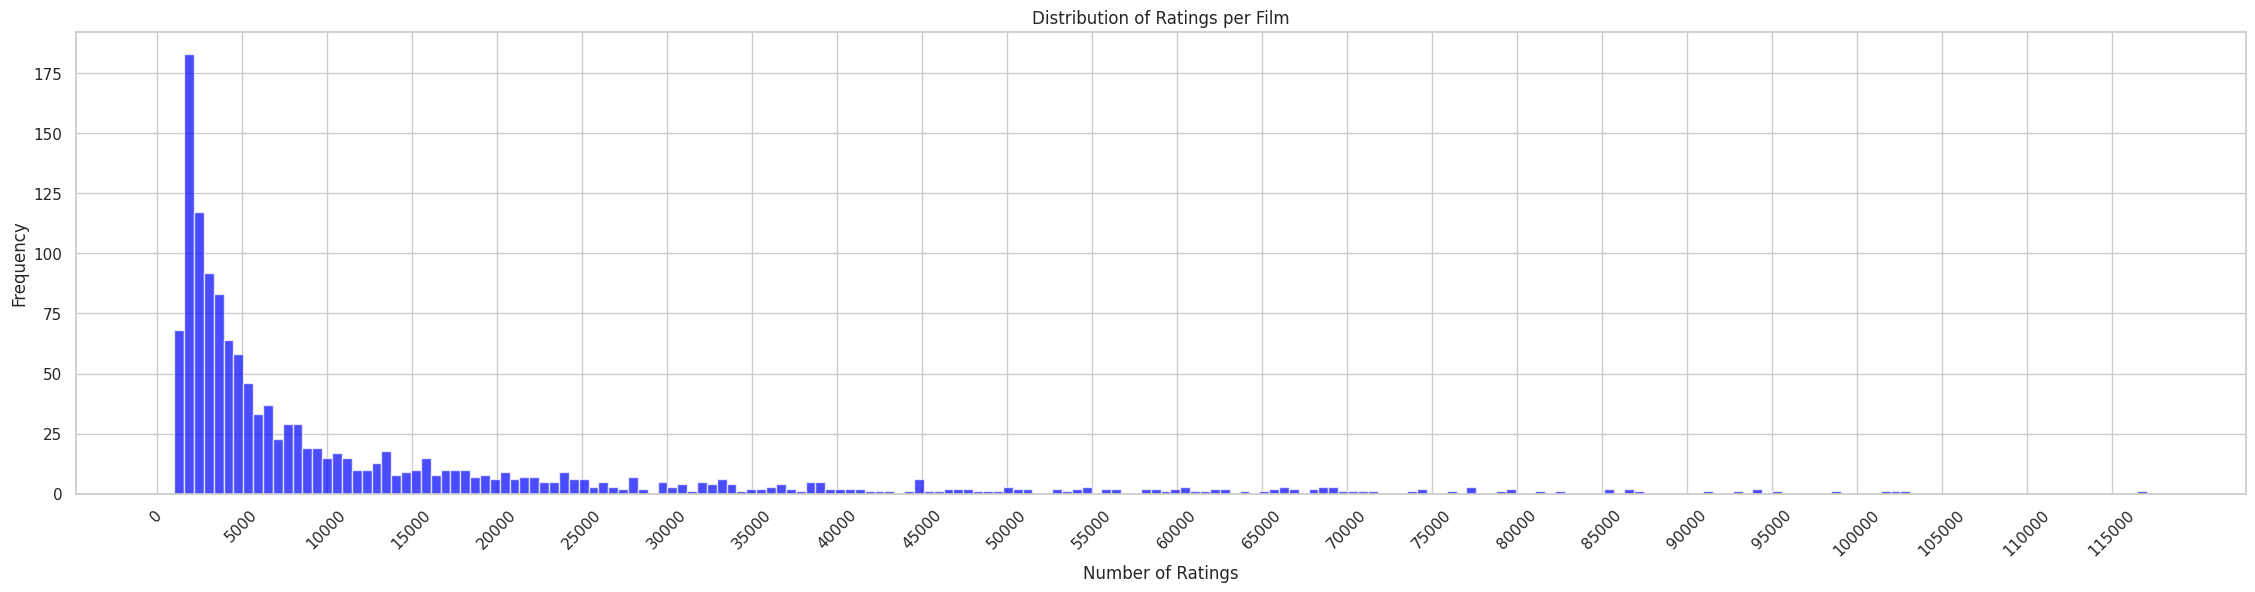

In [59]:
# Number of ratings per film
film_ratings = merged_df.groupby("Movie_ID").size()
print("\nFilm Ratings Distribution:")
print(film_ratings.describe())

# Plot the histogram of ratings by film
plt.figure(figsize=(28, 6))
film_ratings.plot(kind='hist', bins=200, color='blue', alpha=0.7)
plt.title("Distribution of Ratings per Film")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")

# Add more x-ticks
plt.xticks(ticks=range(0, int(film_ratings.max()) + 1, 5000), rotation=45)

plt.show()

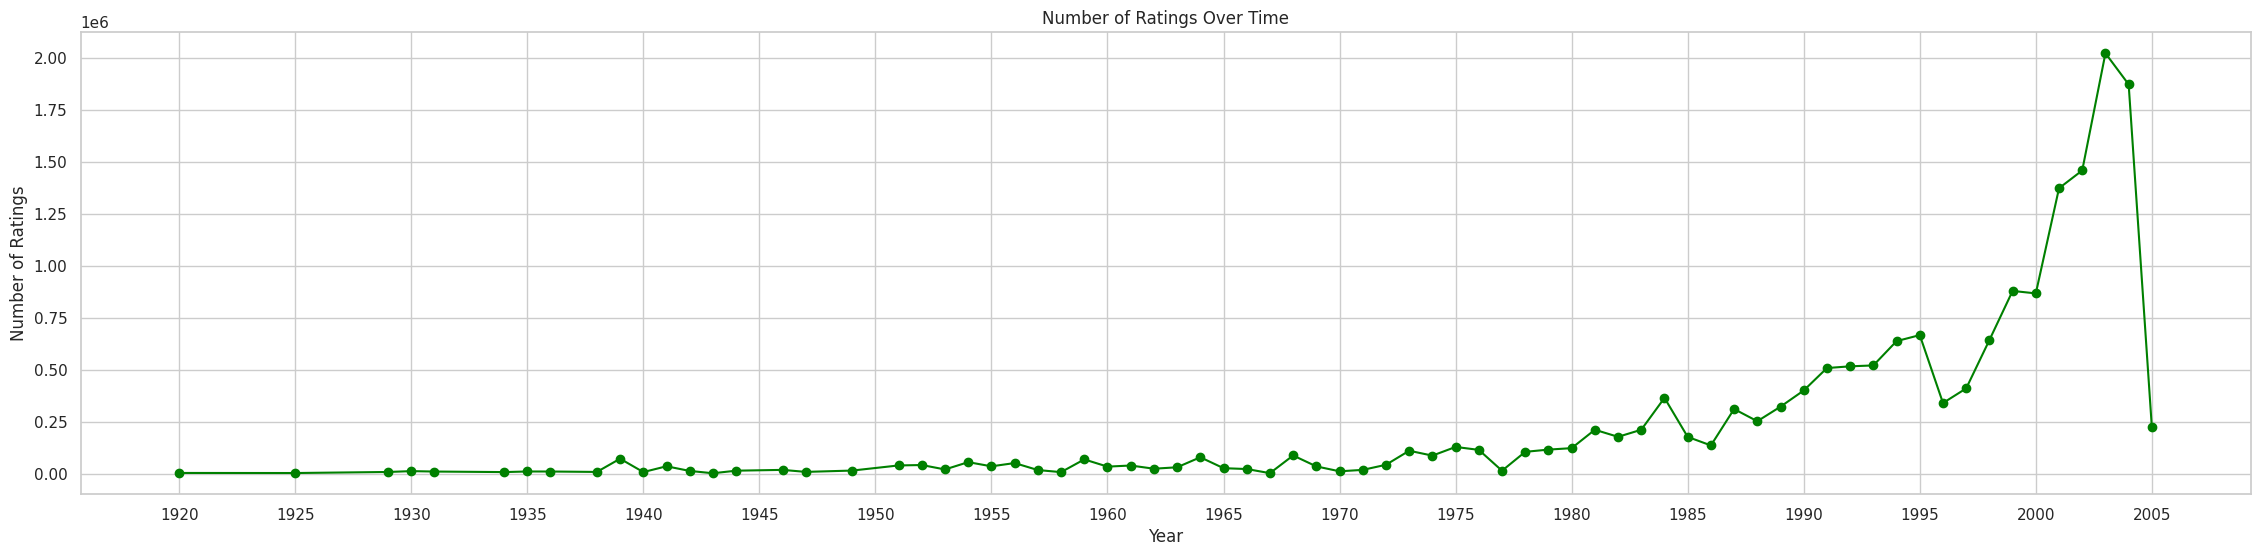

In [60]:
# Rating trends over time
ratings_per_year = merged_df.groupby("Year").size()

plt.figure(figsize=(28, 6))
ax = ratings_per_year.plot(kind='line', marker='o', color='green')

# Add labels for every 10 years
ticks = list(range(ratings_per_year.index.min(), ratings_per_year.index.max() + 1, 5))
ax.set_xticks(ticks)

plt.title("Number of Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.show()

In [61]:
# Users' activity
most_active_users = merged_df.groupby("User_ID").size().sort_values(ascending=False).head(10)
print("\nTop 10 Most Active Users:")
print(most_active_users)

user_avg_rating = merged_df.groupby("User_ID")["Rating"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Users with Highest Average Ratings:")
print(user_avg_rating)


Top 10 Most Active Users:
User_ID
305344     1344
387418     1339
2439493    1324
2118461    1305
1664010    1257
716173     1169
1314869    1132
2056022    1072
1852040    1053
2606799    1039
dtype: int64

Top 10 Users with Highest Average Ratings:
User_ID
1482568    5.0
2298764    5.0
334857     5.0
2304126    5.0
1915847    5.0
723397     5.0
2306976    5.0
2307226    5.0
784490     5.0
283679     5.0
Name: Rating, dtype: float64


### Rating Trends Over Time

The graph illustrates the trend of average ratings over the years. The line plot shows how ratings have changed annually, while the regression line indicates the overall trend (positive, negative, or neutral) in the data. The slope of the regression line quantifies the rate of change in average ratings over time.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Years with Highest and Lowest Ratings:
Year: 1974, Rating: 4.109570377896572
Year: 1920, Rating: 3.3920122887864825


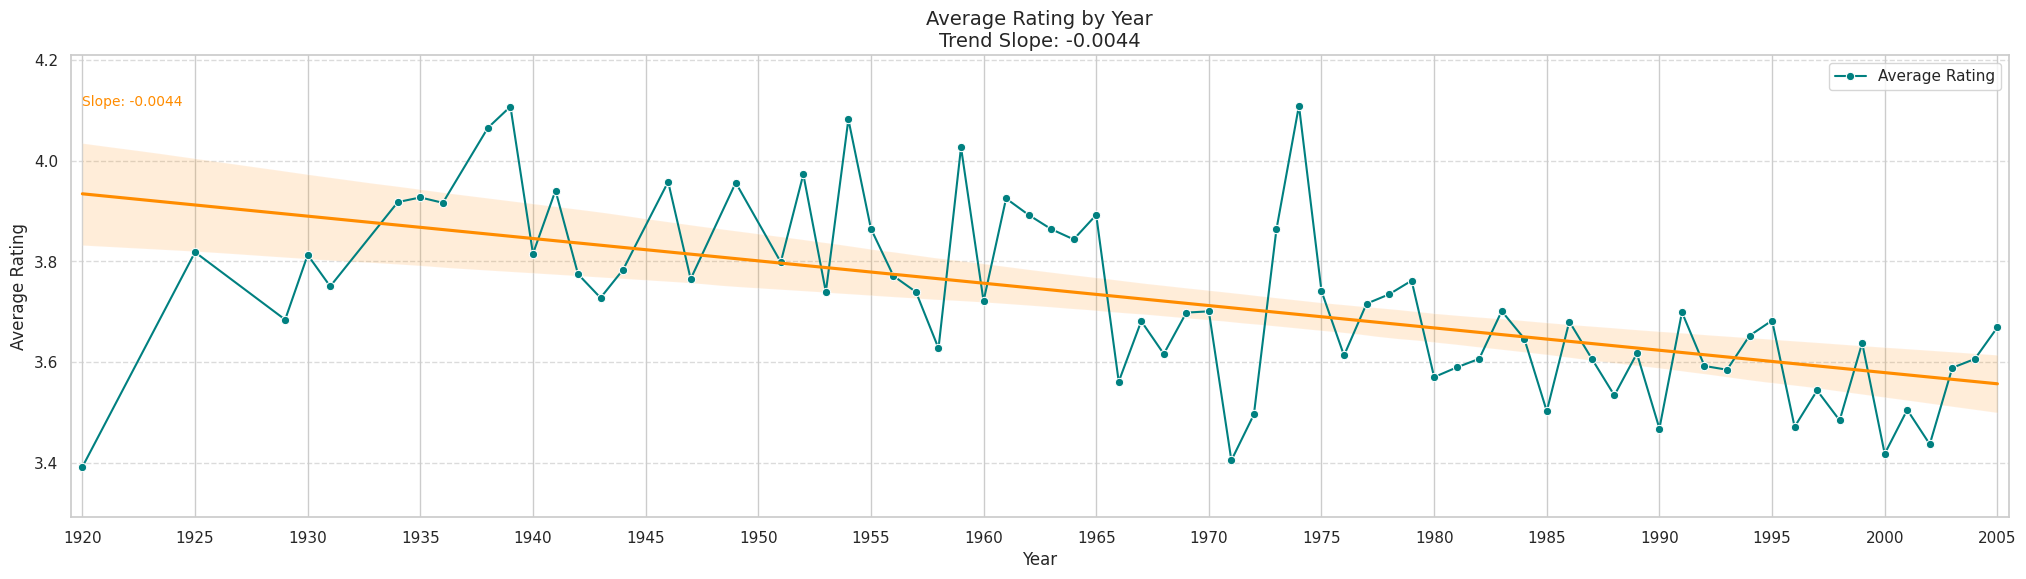

In [62]:
from scipy.stats import linregress

# Average rating by year
ratings_by_year = merged_df.groupby("Year")["Rating"].mean()

# Data for regression
years = ratings_by_year.index
avg_ratings = ratings_by_year.values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, avg_ratings)

# Create the plot
plt.figure(figsize=(25, 6))

# Plot the average ratings
sns.lineplot(x=years, y=avg_ratings, marker='o', color='teal', label='Average Rating')

# Plot the regression line
sns.regplot(
    x=years, 
    y=avg_ratings, 
    scatter=False, 
    color='darkorange', 
    line_kws={'label': 'Trend Line'}
)

# Add title and labels
plt.title(f"Average Rating by Year\nTrend Slope: {slope:.4f}", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)

# Add axis limits
plt.xlim(years.min() - 0.5, years.max() + 0.5)
plt.ylim(avg_ratings.min() - 0.1, avg_ratings.max() + 0.1)

# Add legend
plt.legend()

# Add axis ticks
ticks = list(range(ratings_per_year.index.min(), ratings_per_year.index.max() + 1, 5))
plt.xticks(ticks)

# Add slope as a text annotation
plt.text(years.min(), avg_ratings.max(), f"Slope: {slope:.4f}", fontsize=10, color="darkorange")

# Print years with highest and lowest ratings
max_year = ratings_by_year.idxmax()
min_year = ratings_by_year.idxmin()
max_rating = ratings_by_year.max()
min_rating = ratings_by_year.min()
print("\nYears with Highest and Lowest Ratings:")
print(f"Year: {max_year}, Rating: {max_rating}")
print(f"Year: {min_year}, Rating: {min_rating}")

# Show the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- **Negative Trend**: The regression line shows a slight decline in average ratings over time (slope: -0.0044).
- **Yearly Variability**: Significant fluctuations in ratings suggest external factors influencing the trends.
- **Consistency**: Ratings remain relatively stable, ranging between 3.4 (in 1920) and 4.1 (in 1974).
- **Confidence Interval**: The shaded region indicates uncertainty but supports the negative trend.

In [63]:
# Top movie by number of ratings in each decade
merged_df['Decade'] = (merged_df['Year'] // 10) * 10
top_movies_by_decade = merged_df.groupby(['Decade', 'Name']).size().sort_values(ascending=False).groupby(level=0).head(1)
print("\nTop Movie by Number of Ratings in Each Decade:")
print(top_movies_by_decade)


Top Movie by Number of Ratings in Each Decade:
Decade  Name                                                  
2000    Pirates of the Caribbean: The Curse of the Black Pearl    117075
1990    The Sixth Sense                                           102376
1980    Lethal Weapon                                              76147
1970    Jaws                                                       68535
1930    The Wizard of Oz: Collector's Edition                      61970
1960    Goldfinger                                                 36010
1950    North by Northwest                                         32928
1940    The Maltese Falcon                                         25310
1920    Nosferatu: Original Version                                 7923
dtype: int64


In [64]:
user_rating_variance = merged_df.groupby("User_ID")["Rating"].var()
print("\nTop 10 Users with Highest Rating Variance:")
print(user_rating_variance.sort_values(ascending=False).head(10))


Top 10 Users with Highest Rating Variance:
User_ID
1615158    3.926031
314357     3.881525
859047     3.874081
1820160    3.839123
406471     3.813860
2022704    3.790100
2539534    3.758272
2507130    3.747126
2151973    3.735619
1573749    3.710145
Name: Rating, dtype: float64


In [65]:
low_rated_movies = merged_df.groupby("Movie_ID").size()
print("\nMovies with Fewer than 10 Ratings:")
print(low_rated_movies[low_rated_movies < 10])

low_activity_users = merged_df.groupby("User_ID").size()
print("\nUsers with Fewer than 5 Ratings:")
print(low_activity_users[low_activity_users < 5])


Movies with Fewer than 10 Ratings:
Series([], dtype: int64)

Users with Fewer than 5 Ratings:
Series([], dtype: int64)


In [66]:
num_movies = merged_df['Movie_ID'].nunique()
num_users = merged_df['User_ID'].nunique()
num_ratings = len(merged_df)

sparsity = 1 - (num_ratings / (num_movies * num_users))
print(f"\nMatrix Sparsity: {100 * sparsity:.3f}%")


Matrix Sparsity: 91.048%


### Histogram of Rating Variance Across Users

This histogram visualizes the distribution of rating variances across users. Each bar in the plot represents the number of users whose rating variance falls within a specific range.

#### Key Points:
- **Rating Variance**: This measures how much an individual user's ratings differ from their average rating. A higher variance indicates more inconsistency in the user's ratings, while a lower variance suggests more consistent ratings.
- **X-Axis (Rating Variance)**: Represents the range of variance in users' ratings.
- **Y-Axis (Number of Users)**: Indicates the count of users whose rating variance falls within each range.

#### Insights:
- The shape of the histogram can reveal user behavior patterns. 
  - A peak near zero variance may suggest that many users rate consistently around the same score.
  - A wider spread might indicate a mix of consistent and inconsistent rating behaviors across the user base.
- Understanding these patterns can help identify different user groups or behaviors, potentially informing recommender system strategies.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


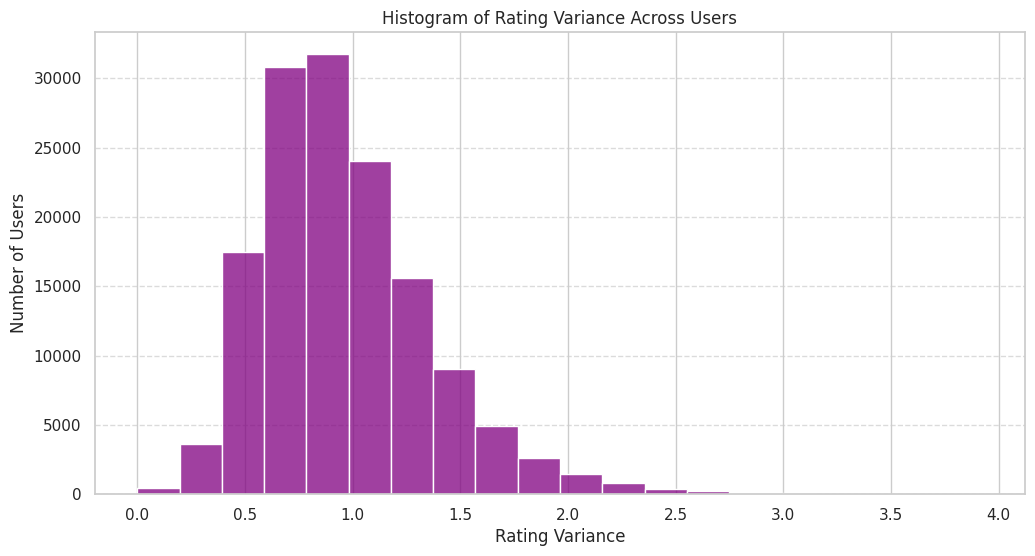

In [70]:
# Plot histogram of the rating variance
plt.figure(figsize=(12, 6))
sns.histplot(user_rating_variance.dropna(), bins=20, kde=False, color="purple")
plt.title("Histogram of Rating Variance Across Users")
plt.xlabel("Rating Variance")
plt.ylabel("Number of Users")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

This histogram shows the distribution of rating variances among users:

- **Most users have low to moderate variance** (0.5 to 1.0), indicating consistent rating behavior.
- **Few users have high variance** (above 2.0), reflecting more unpredictable rating patterns.
- The distribution is right-skewed, with a sharp decline in the number of users as variance increases.

**Implications**:
- Users with low variance are easier to model, as their preferences are stable.
- High variance users may require more sophisticated personalization strategies.

## Conclusions

This project analyzed a large dataset of 17,770 movies and over 17 million user ratings. Key findings include a slight decline in average ratings over time, stable user behavior with most users showing low rating variance, and the identification of top-rated movies across decades. Insights suggest that stable users are easier to model for recommendations, while high-variance users require more advanced strategies. Overall, the analysis provides valuable input for building effective and personalized movie recommender systems.

**Next Steps**:
   - <a href="https://www.kaggle.com/code/lorenzoarcioni/collaborative-neighbors-recommending-system" target="_blank">Here</a>, we explore a **Collaborative Filtering Neighborhood** approach that combines neighborhood techniques to improve the quality of recommendations.
   - <a href="https://www.kaggle.com/code/lorenzoarcioni/collaborative-latend-factors-recommending-system" target="_blank">Here</a> instead, we explore a **Collaborative Filtering Latent Factor** approach that utilizes latent factors for personalized recommendations. (In progress)

This work represents an important step in understanding the fundamentals of recommendation systems, while leaving room for further optimizations and enhancements.